In [25]:
from tools.utils import inverse_list, pcut
import numpy as np
import matplotlib.pyplot as plt
import json
import os

# Particionar Modelo

Dado um dataset da tarefa de geofísica, particionamos em treino validação e teste e guardamos a partição em um arquivo json. O arquivo contém.

 * images_folder: caminho relativo ao dataset com as imagens
 * image_names: nomes das imagens na pasta
 * image_classes: classes das imagens, em inteiro
 * id_to_class: mapa das classes inteiras para a classe em caracteres
 * class_to_id: mapa das classes em caracteres para inteiros
 * train: imagens de treino
 * dev: imagens de validação
 * test: imagens de teste
 
Salvamos o arquivo no path abaixo

In [26]:
result_path = 'data/test_2.json'

### Carregar Dados (Sem augmentation)

Carregamos o arquivo com as classificações das imagens e apontamos para a pasta contendo as imagens

In [44]:
# Arquivo com as classificações por imagem
classification = '../classification/test.txt'
# Pasta contendo as imagens
images_folder = '../dataset/test/'

Mapeamos as classes em inteiros

In [45]:
# id_to_class = ['B','M','R']
id_to_class = ['good','bad','ugly']
class_to_id = inverse_list(id_to_class)

Para cada imagem recuperamos a classificação como inteiros

In [50]:
with open(classification,'r') as f:
    content = f.read()

In [51]:
lines = content.split('\n')
lines = lines[:-1]
image_names = []
image_classes = []
for line in lines:
    name, c = line.split(',')
    image_names.append(name)
    image_classes.append(class_to_id[c])

Segue a distribuição das classes

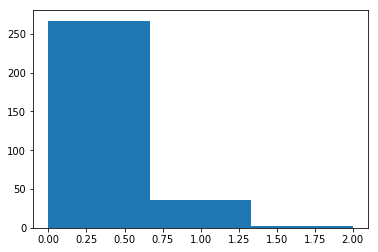

In [52]:
r = plt.hist(image_classes,bins=len(id_to_class))

In [53]:
def returnSum(dict):  
     sum = 0
     for i in dict.values(): 
           sum = sum + i 
     return sum

id_to_freq = r[0]
class_freq = dict(zip(id_to_class, id_to_freq))
sum_freq = returnSum(class_freq)

print(class_freq, sum_freq)
[x/sum_freq for x in class_freq.values()]

{'good': 267.0, 'bad': 36.0, 'ugly': 2.0} 305.0


[0.8754098360655738, 0.1180327868852459, 0.006557377049180328]

### Separação de dados

Separamos os dados em treino, validação e teste. Mantendo as proporções das classes em cada conjunto

Inicialmente separamos os elementos de cada classe

In [54]:
imclasses = np.array(image_classes)

good = np.where(imclasses == 0)[0]
bad = np.where(imclasses == 1)[0]
ugly = np.where(imclasses == 2)[0]

Definimos as proporções de treino, validação e teste

In [55]:
partitions = [0.7, 0.1, 0.2] # train, dev, test end proportions

Criamos a lista de índices de treino validação e teste

In [62]:
good_part = pcut(good, partitions)
bad_part = pcut(bad, partitions)
ugly_part = pcut(ugly, partitions)
c_parts = [good_part, bad_part, ugly_part]

train = np.concatenate([x[0] for x in c_parts])
dev = np.concatenate([x[1] for x in c_parts])
test = np.concatenate([x[2] for x in c_parts])

186
26
53
25
3
7
1
0
0


[array([303]), array([], dtype=int64), array([], dtype=int64)]

Guardamos os nomes das imagens das partições de treino, validação e teste num arquivo json

In [57]:
train_names = np.array(image_names)[train]
dev_names = np.array(image_names)[dev]
test_names = np.array(image_names)[test]

save_at = result_path

dataset_partition = {
    'train':train.tolist(),
    'dev':dev.tolist(),
    'test':test.tolist(),
    'image_names':image_names,
    'image_classes':image_classes,
    'images_folder':images_folder,
    'id_to_class':id_to_class,
    'class_to_id':class_to_id
}

with open(save_at, 'w') as f:
    json.dump(dataset_partition, f)

# Ler JSON Particionado

In [1]:
import json
import os

json_path = 'results/analyze/'
json_list = os.listdir(json_path)
json_list.sort()

file = {'ugly_mean_recall':[],'train_dp_acc':[],'ugly_dp_recall':[],'model_name':[],
        'train_mean_acc':[],'dev_dp_acc':[],'elapsed_time':[],'dev_mean_acc':[]}

for json_data in json_list:
    with open(json_path+json_data, 'r') as f:
        data_desc = json.load(f)
        [file[partition].append( data_desc[partition] ) 
         for partition in data_desc 
         if partition not in ['ugly_recall_list','dev_acc_list','model_description',
                              'train_acc_list','experiment_description']]


### Apresenta gráficos sobre os arquivos

O valor máximo de acurácia é 0.9473524962178518 - 3_99_busson_model 

O valor máximo de Ugly Recall é 0.9198203073536961 - 4_199_busson_model 

Arquivos lidos 
 ['1_149_busson_model', '1_199_busson_model', '1_249_busson_model', '1_299_busson_model', '1_99_busson_model', '2_149_busson_model', '2_199_busson_model', '2_249_busson_model', '2_299_busson_model', '2_99_busson_model', '3_149_busson_model', '3_199_busson_model', '3_249_busson_model', '3_299_busson_model', '3_99_busson_model', '4_149_busson_model', '4_199_busson_model', '4_249_busson_model', '4_299_busson_model', '4_99_busson_model', '5_299_busson_model'] 

---------------   Recall do Ugly   -------------------


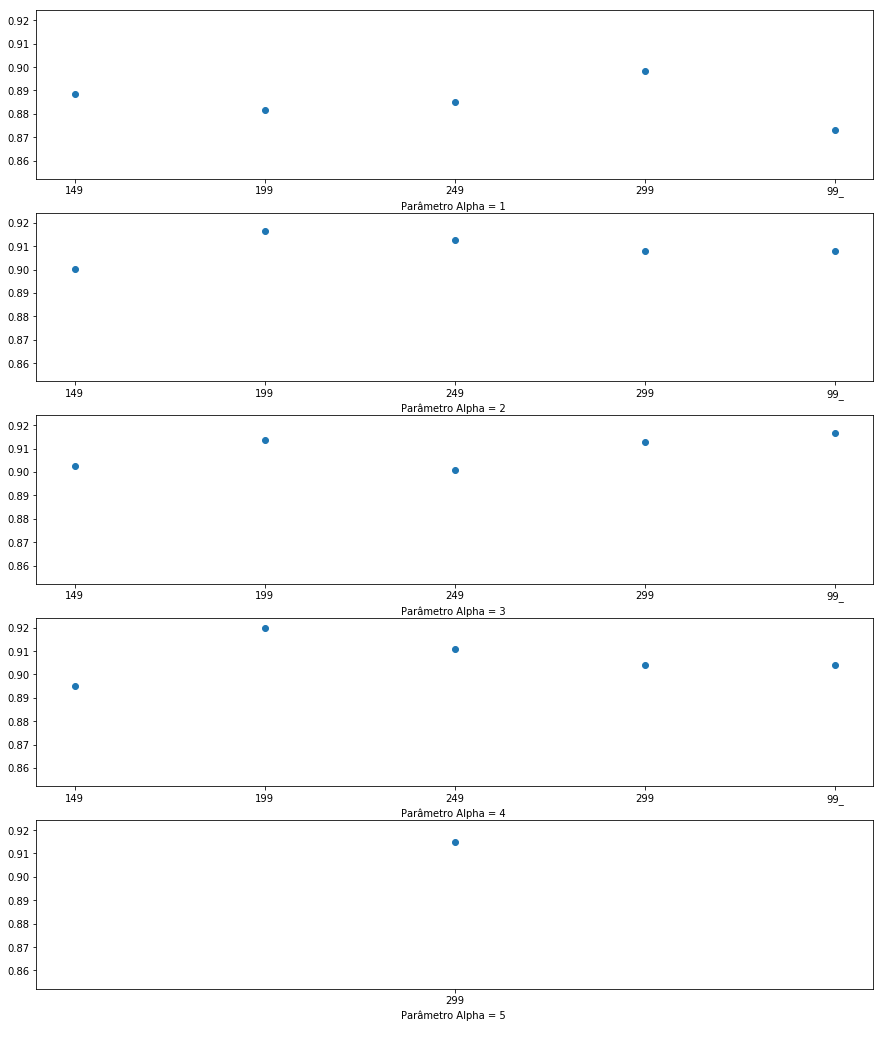

---------------   Acurácia de Validação   -------------------


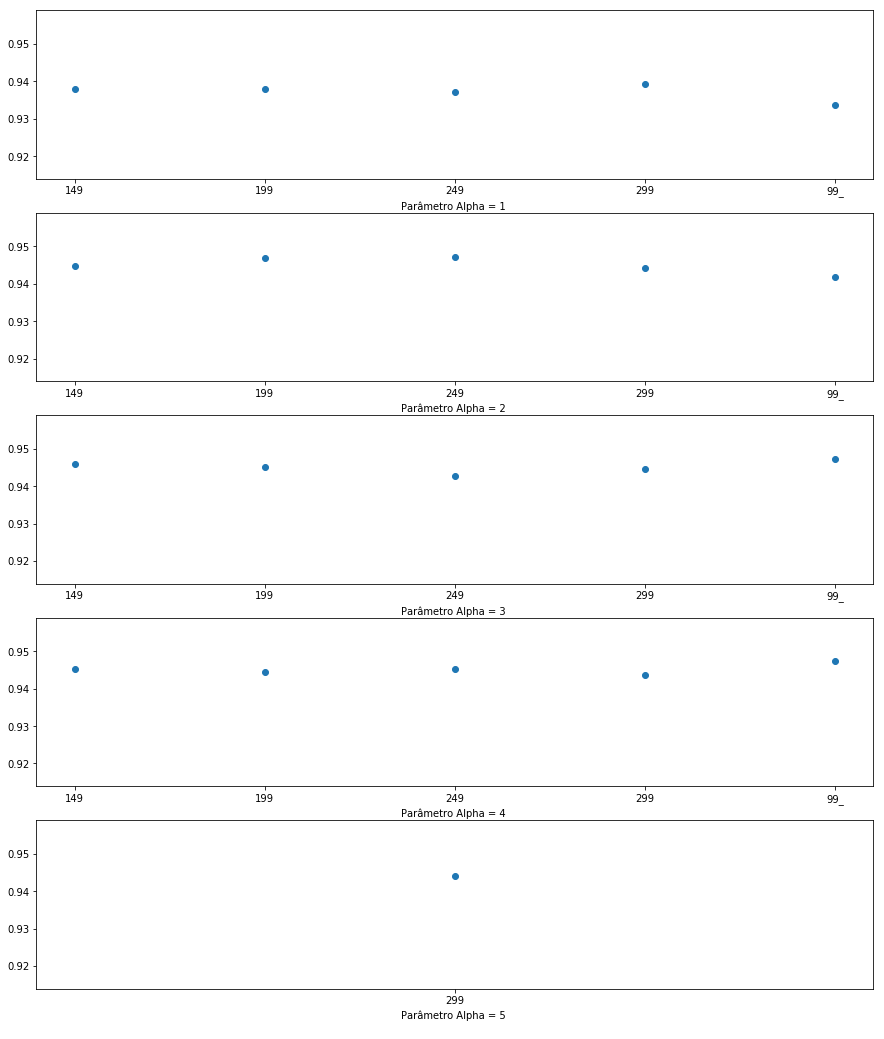

---------------   Acurácia de Treino   -------------------


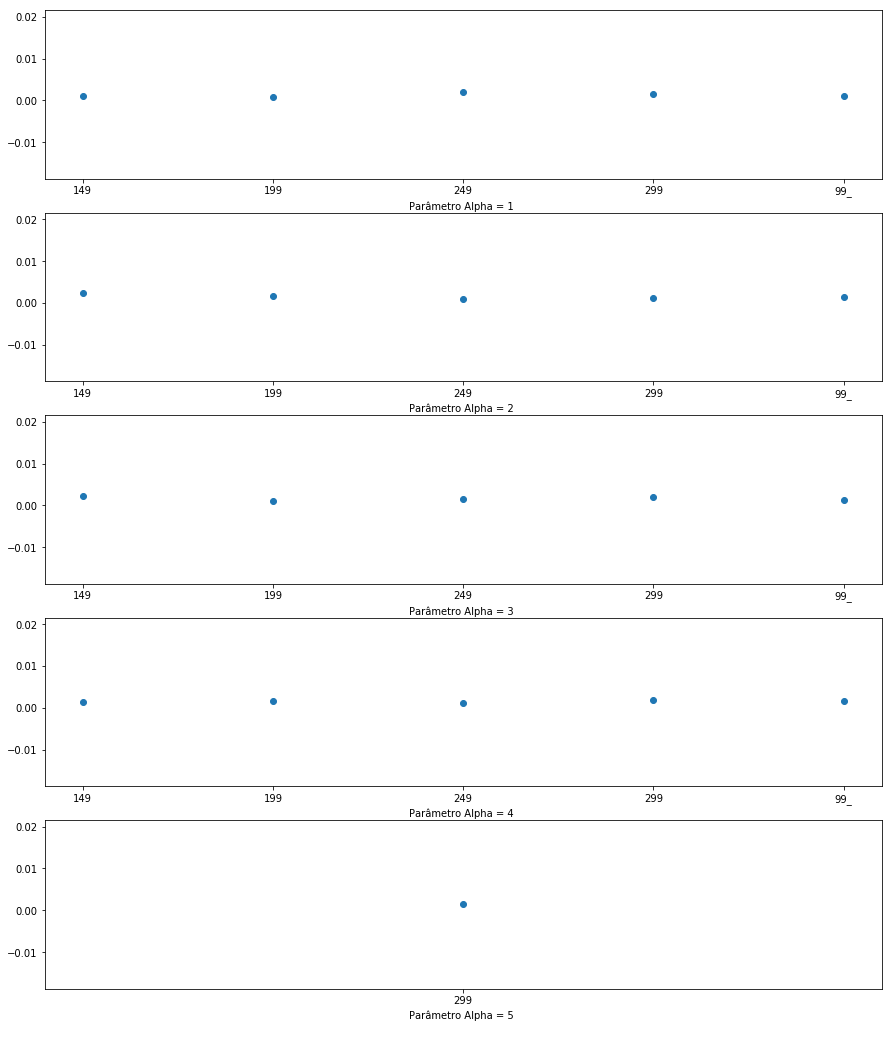

In [11]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
alphas = [1,2,3,4,5]

maximun = max(file['dev_mean_acc'])
index_maximun = file['dev_mean_acc'].index(maximun)
maximun_name = file['model_name'][index_maximun]
print ( 'O valor máximo de acurácia é %s - %s \n' % (maximun , maximun_name) )

maximun = max(file['ugly_mean_recall'])
index_maximun = file['ugly_mean_recall'].index(maximun)
maximun_name = file['model_name'][index_maximun]
print ( 'O valor máximo de Ugly Recall é %s - %s \n' % (maximun , maximun_name) )
    
print('Arquivos lidos \n %s \n' % file['model_name'])
ind = np.arange(len(file['model_name']))

print('---------------   Recall do Ugly   -------------------')
fig, axs = plt.subplots(5, 1, figsize=(15, 18), sharey=True)
for i, alpha in enumerate(alphas):
    axs[i].scatter(
        [x[2:5] for x in file['model_name'] if x[:1]==str(alpha)],
        [file['ugly_mean_recall'][i] for i, x in enumerate(file['model_name']) if x[:1]==str(alpha)])
    #plt.xticks(ind, tuple([x[2:5] for x in file['model_name'] if x[:1]==str(alpha)]))
    axs[i].set_xlabel('Parâmetro Alpha = %s \n' % alpha)
plt.show()

print('---------------   Acurácia de Validação   -------------------')
fig, axs = plt.subplots(5, 1, figsize=(15, 18), sharey=True)
for i, alpha in enumerate(alphas):
    axs[i].scatter(
        [x[2:5] for x in file['model_name'] if x[:1]==str(alpha)],
        [file['dev_mean_acc'][i] for i, x in enumerate(file['model_name']) if x[:1]==str(alpha)])
    #plt.xticks(ind, tuple([x[2:5] for x in file['model_name'] if x[:1]==str(alpha)]))
    axs[i].set_xlabel('Parâmetro Alpha = %s \n' % alpha)
plt.show()
 
print('---------------   Acurácia de Treino   -------------------')
fig, axs = plt.subplots(5, 1, figsize=(15, 18), sharey=True)
for i, alpha in enumerate(alphas):
    axs[i].scatter(
        [x[2:5] for x in file['model_name'] if x[:1]==str(alpha)],
        [file['train_dp_acc'][i] for i, x in enumerate(file['model_name']) if x[:1]==str(alpha)])
    #plt.xticks(ind, tuple([x[2:5] for x in file['model_name'] if x[:1]==str(alpha)]))
    axs[i].set_xlabel('Parâmetro Alpha = %s \n' % alpha)
plt.show()
